# Example usage  of `Data` class and `load_data_file` utility function to manage PRMS input

The `prms_python` module provides the `Data` class to facilitate management, modification, and visualization of the PRMS input data. `prms_python` also includes a simpler utility function `load_data_file` that returns the data file as a date-indexed Pandas Dataframe object. 

## First  example showcases the `Data` class and some of it's capabilities

Example of creating a `Data` object instance to view its data using Pandas, modify it's data with a function, and resave the data in PRMS data file format.

In [1]:
from __future__ import print_function
import sys, os
sys.path.append('..')
from prms_python.util import load_data_file
from prms_python import Data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
%load_ext autoreload
%autoreload 2

Find the path of your existing data file which is the only input argument when initiating a `Data` object

In [2]:
data_file = ('../test/data/models/lbcd/data') 
data = Data(data_file)

## View contents of `Data` in Pandas Dataframe format
The `Data` object reformats the PRMS data file contecnts into a date-indexed [Pandas Dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) which is useful for time series analysis and visualization, below are a few examples of what you can easily do with Pandas, you may want to visit the [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to utilize more of its powerful functionaility.  

In [3]:
df = data.data_frame
df.tail() # last five rows of data

input variables,runoff 1,runoff 2,runoff 3,precip,tmax,tmin
date,,,,,,
1996-12-27,0.54,1.6,NaN,0.0,46,32.0
1996-12-28,0.65,1.6,NaN,0.0,45,24.0
1996-12-29,0.80,1.6,NaN,0.0,44,28.0
1996-12-30,0.90,1.6,NaN,0.0,51,33.0
1996-12-31,1.00,1.7,NaN,0.0,47,32.0


## Plot all variables in data file

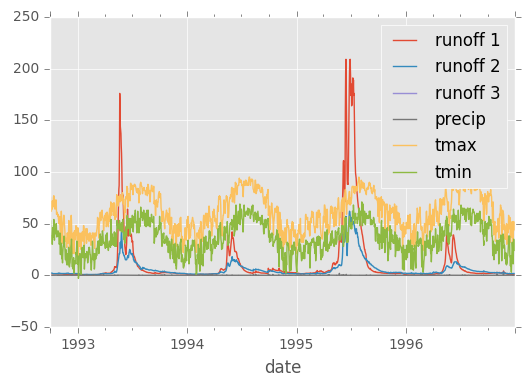

In [4]:
df.plot()
plt.legend() # relocates legend to best location

## Plot a subset of the data
Pandas date index allows for convenient slicing based on date strings for example '10-01-1993':'09-30-1994' will return the slice from '10-01-1993' to '09-30-1994', the loc method also allows to select a subset of the columns in the dataframe as shown below.

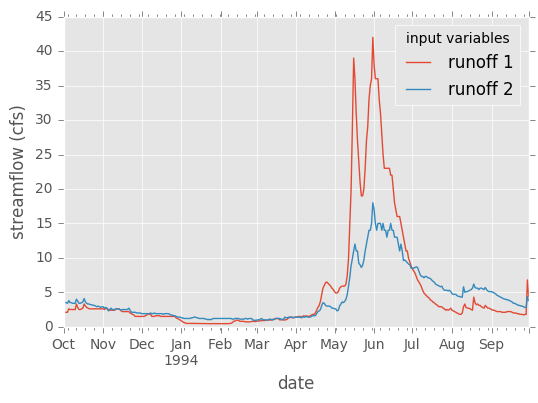

In [5]:
df.loc['10-01-1993':'09-30-1994', ['runoff 1', 'runoff 2']].plot()
plt.ylabel('streamflow (cfs)')

## Summary statistics

In [6]:
df.describe() 

input variables,runoff 1,runoff 2,runoff 3,precip,tmax,tmin
count,1553.000000,1553.000000,0.0,1553.000000,1553.000000,1552.000000
mean,11.260058,5.998307,NaN,0.038049,61.195106,36.197809
std,28.632066,8.970775,NaN,0.128580,18.175971,15.005098
min,0.010000,0.630000,NaN,0.000000,17.000000,-3.000000
25%,1.500000,1.600000,NaN,0.000000,46.000000,26.000000
50%,2.300000,2.700000,NaN,0.000000,60.000000,34.000000
75%,5.100000,6.000000,NaN,0.000000,78.000000,49.000000
max,209.000000,62.000000,NaN,1.850000,95.000000,71.000000


## Use [pandas groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html) to get monthly means for temperature

In [7]:
df[['tmin','tmax']].groupby(df.index.month).mean() # index is now months 1,2,3,...,12

input variables,tmin,tmax
1,21.370968,41.524194
2,22.920354,44.469027
3,28.580645,51.500000
4,32.700000,58.775000
5,40.879032,67.637097
6,48.325000,78.058333
7,56.758065,86.145161
8,56.766129,85.008065
9,47.949580,76.133333
10,37.290323,62.251613


## Plot the monthly mean temperatures in the data file

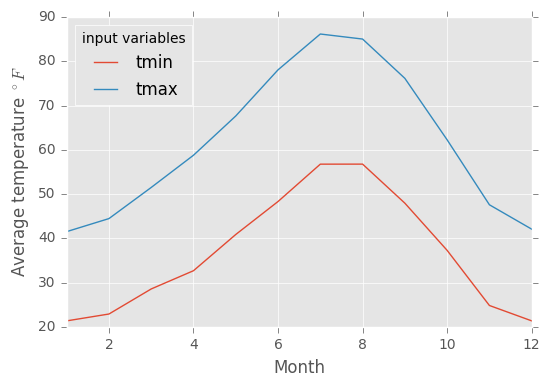

In [8]:
df[['tmin','tmax']].groupby(df.index.month).mean().plot()
plt.ylabel('Average temperature '+r'$^\circ F$') # matplotlib has built in LaTeX capabilities
plt.xlabel('Month')

# Example use of `data.modify` method to manipulate one or more data variables in place

This example shows how to easily modify temperature to simulate a hypothetical warmer climate by shifting the daily minimum and maximum temperature up by 3 degrees, other more sophisticated modifications would follow a similar process. We will apply the modifications to a new data instance. Of course you can do your own much more sophisticated methods to adjust variables in the data file using Pandas and other Python libraries, the possibilities are limitless. 

In [9]:
def warm_shift(x):
    return x + 3

new_data = Data(data_file)
new_data.modify(warm_shift, ['tmin', 'tmax'])
ndf = new_data.data_frame
## show that the data has in fact been shifted up by 3 degrees
print('original:\n', df[['tmin', 'tmax']].describe(),\
      '\n\nmodified:\n', ndf[['tmin', 'tmax']].describe())

original:
 input variables         tmin         tmax
count            1552.000000  1553.000000
mean               36.197809    61.195106
std                15.005098    18.175971
min                -3.000000    17.000000
25%                26.000000    46.000000
50%                34.000000    60.000000
75%                49.000000    78.000000
max                71.000000    95.000000 

modified:
 input variables         tmin         tmax
count            1552.000000  1553.000000
mean               39.197809    64.195106
std                15.005098    18.175971
min                 0.000000    20.000000
25%                29.000000    49.000000
50%                37.000000    63.000000
75%                52.000000    81.000000
max                74.000000    98.000000


# Save the adjusted data  (`new_data`) to a new PRMS formatted data file using `Data.write`

This example shows that we can rewrite the PRMS data back to a text file that is suitable for PRMS, this is the case if you modify the existing data in the original data file however if you needed to add additional data variables to the original file (e.g. an additional temperature measurement station) you would also need to manually
add the new data file metadata information. Below we write our current data where we modified the temperature variables to a new PRMS data file and then reopen the file and print the top twenty lines to verify that everything looks right. 

In [10]:
new_data.write('../test/data/models/lbcd/data_3deg_upshift')

In [11]:
with open('../test/data/models/lbcd/data_3deg_upshift', 'r') as inf:
    for i,line in enumerate(inf):
        print(line.strip())
        if i == 20: break

Data file created by John Volk 2014 all rights reserved
////////////////////////////////////////////////////////////
// Station metadata (listed in the same order as the data):
// ID Type Latitude Longitude Elevation Stream
// 10243240 runoff 38.9908 -114.2067 6750 Baker
// 10243260 runoff 39.0116 -114.2144 6700 Lehman
// 10243265 runoff 39.0086 -114.2078 6580 Rowland
// 263340 precip 39.0056 -114.2206 6850
// 263340 tmax 39.0056 -114.2206 6850
// 263340 tmin 39.0056 -114.2206 6850
////////////////////////////////////////////////////////////
// Unit: runoff = ft3 per "sec " precip = "in " temperature = deg "F " elevation = feet
////////////////////////////////////////////////////////////
runoff 3
precip 1
tmax 1
tmin 1
########################################
1992 10 1 0 0 0 1.2 1.9 -999 0.0 80 55.0
1992 10 2 0 0 0 1.3 2.0 -999 0.0 78 56.0
1992 10 3 0 0 0 1.4 2.1 -999 0.0 65 47.0


# Example use of `load_data_file` utility function

The load_data_file utility function is a bit simpler than the Data class, it simply reads any PRMS formatted data file and returns it as a date-indexed Pandas dataframe. Use this function when you do not need to rewrite modified data back to a new PRMS text file. This example will load the data file that was created by modifying the original above. 

In [12]:
df = load_data_file('../test/data/models/lbcd/data_3deg_upshift')

In [13]:
df.head()

input variables,runoff_1,runoff_2,runoff_3,precip,tmax,tmin
date,,,,,,
1992-10-01,1.2,1.9,NaN,0.0,80,55.0
1992-10-02,1.3,2.0,NaN,0.0,78,56.0
1992-10-03,1.4,2.1,NaN,0.0,65,47.0
1992-10-04,1.5,2.2,NaN,0.0,65,37.0
1992-10-05,1.5,2.2,NaN,0.0,65,38.0
